In [2]:
batter = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/%ED%83%80%EC%9E%90.csv'
picher = 'https://raw.githubusercontent.com/leekyuyoung202306/PYTHON/main/12%EC%A3%BC%EC%B0%A8/data/%ED%88%AC%EC%88%98.csv'

In [3]:
import pandas as pd
batter_df =  pd.read_csv(batter)
picher_df =  pd.read_csv(picher)

In [5]:
# matplotlib 한글적용

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
plt.plot([1, 2, 3], [1, 2, 3])
plt.title('한글')

In [1]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [5]:
# 프로야구 선수 연봉 예측 2018

In [8]:
picher_df.head(3)

,선수명,팀명,승,패,세,홀드,블론,경기,선발,이닝,...,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,켈리,SK,16,7,0,0,0,30,30,190.0,...,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,소사,LG,11,11,1,0,0,30,29,185.1,...,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,양현종,KIA,20,6,0,0,0,31,31,193.1,...,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000


In [9]:
picher_df['연봉(2018)'].describe()

count       152.000000
mean      18932.236842
std       30940.732924
min        2700.000000
25%        4000.000000
50%        7550.000000
75%       18500.000000
max      230000.000000
Name: 연봉(2018), dtype: float64

<Axes: >

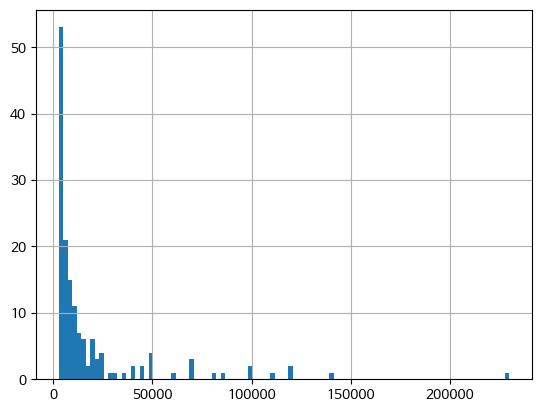

In [12]:
# 연봉분포를 출력
picher_df['연봉(2018)'].hist(bins=100)

<Axes: >

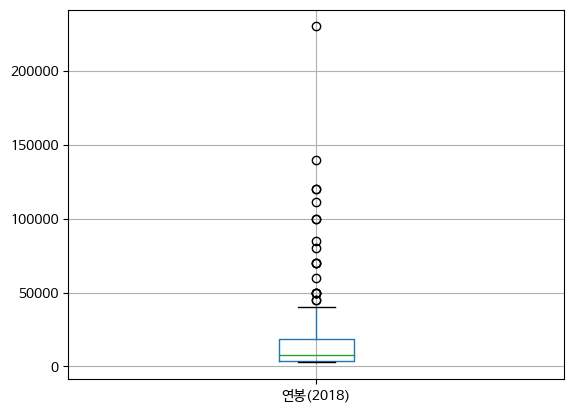

In [14]:
# boxplot
picher_df.boxplot(column=['연봉(2018)'])

In [18]:
# 회귀분석에 사용할 피처
picher_df_feature = picher_df.loc[:,'승':]
picher_df_feature.head(3)

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2018),연봉(2017)
0,16,7,0,0,0,30,30,190.0,8.95,2.13,0.76,0.342,73.7,3.60,6.91,3.69,3.44,6.62,140000,85000
1,11,11,1,0,0,30,29,185.1,7.43,1.85,0.53,0.319,67.1,3.88,6.80,3.52,3.41,6.08,120000,50000
2,20,6,0,0,0,31,31,193.1,7.36,2.09,0.79,0.332,72.1,3.44,6.54,3.94,3.82,5.64,230000,150000


20


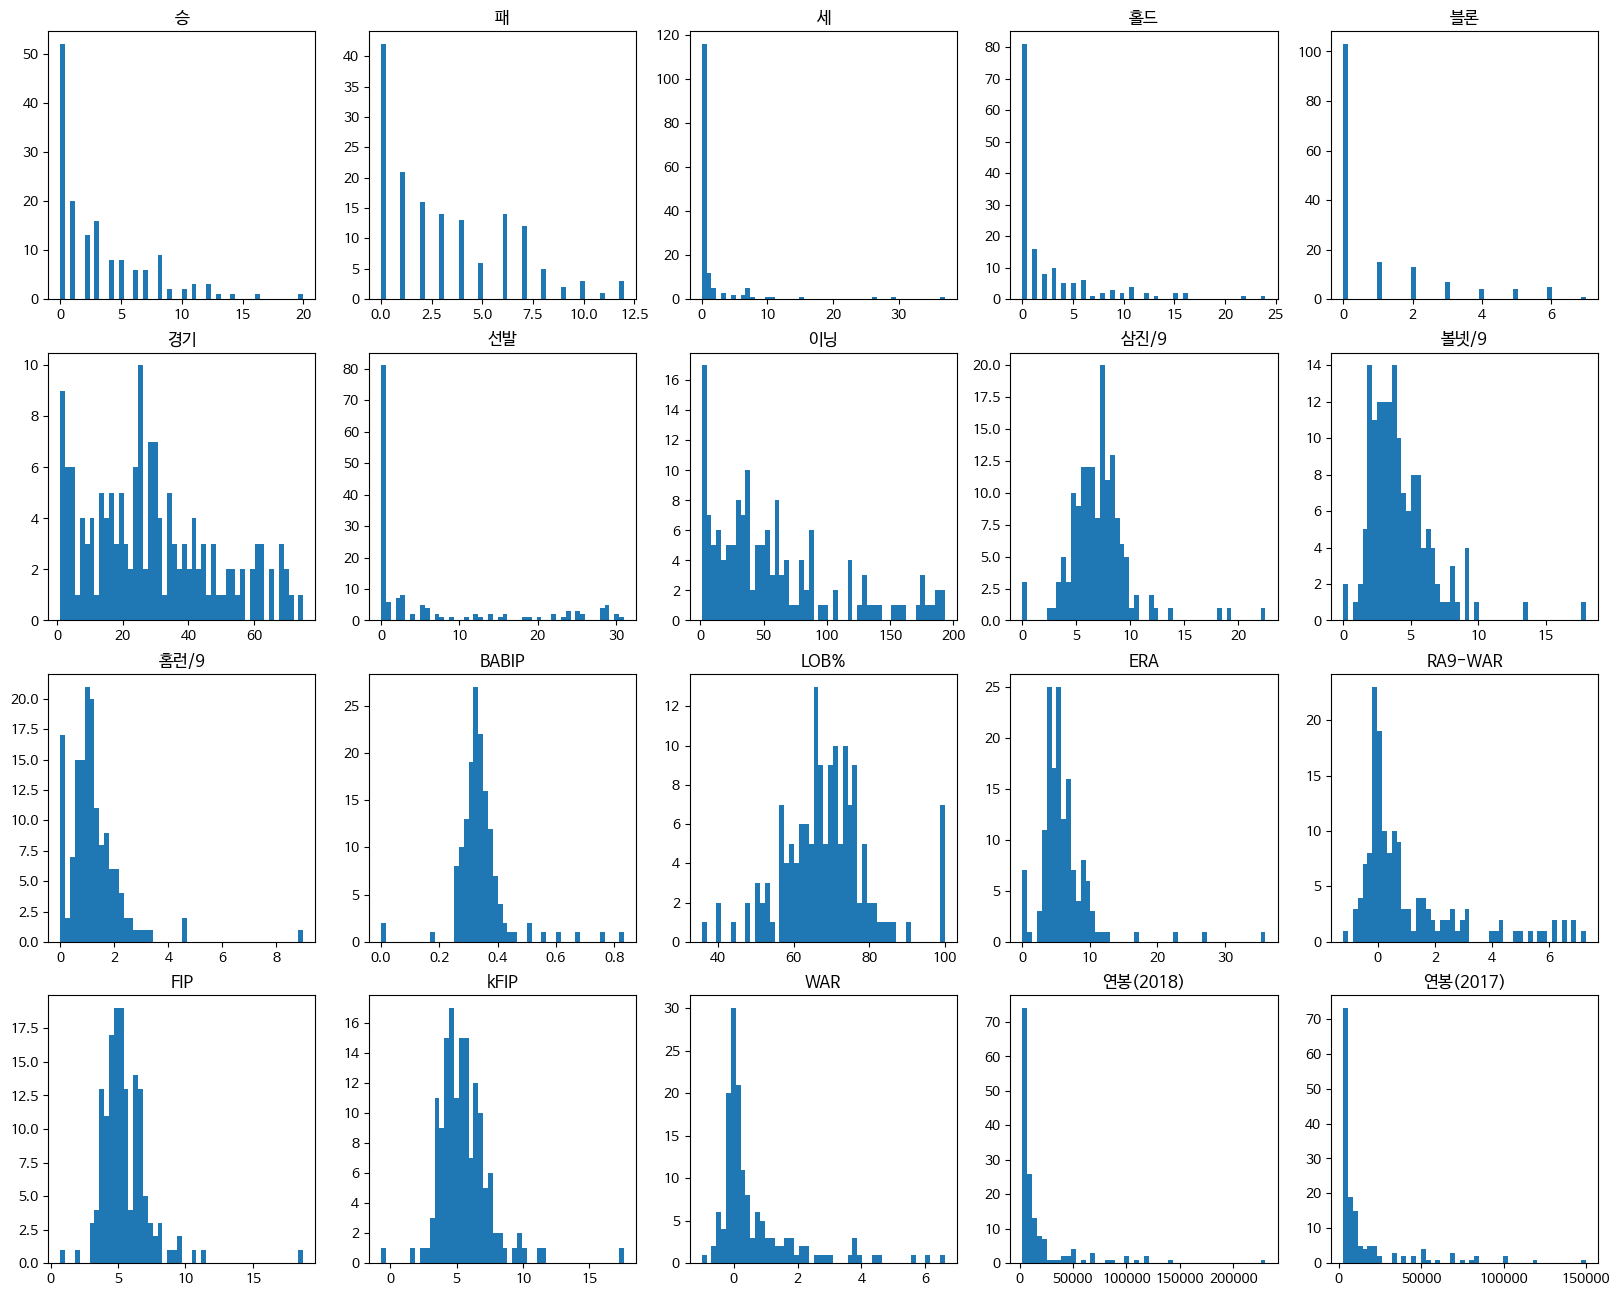

In [23]:
# 각 피처별 데이터 분포 - hist
def plot_hist_cols(df):
  print(len(df.columns))
  plt.figure(figsize=(20,16))
  for idx, col in enumerate( df.columns ):
    plt.subplot(4,5,idx+1)
    plt.hist(df[col],bins = 50)
    plt.title(col)
  plt.show()

plot_hist_cols(picher_df_feature)

In [39]:
train = picher_df_feature.drop(columns=['연봉(2018)'])
target = picher_df_feature['연봉(2018)']

In [40]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [41]:
train_scaled = ss.fit_transform(train)
train_scaled = pd.DataFrame(train_scaled, columns=train.columns)
train_scaled.head()

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017)
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.059630,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724
2,4.363295,0.910752,-0.307465,-0.587641,-0.545389,0.111423,2.563077,2.715757,0.110138,-0.888857,-0.414250,-0.095911,0.309604,-0.627523,2.983779,-0.840183,-0.869225,3.774393,5.347500
3,1.766502,1.231202,-0.307465,-0.587641,-0.545389,-0.043956,2.254370,2.358699,0.351424,-0.948305,-0.187363,-0.479259,0.560612,-0.629931,2.749783,-0.700764,-0.762899,3.007992,3.344612
4,2.545540,1.231202,-0.307465,-0.587641,-0.545389,0.059630,2.460174,2.596072,0.156266,-0.880365,-0.295875,-0.197386,0.482713,-0.540837,2.760666,-0.614968,-0.621132,2.818289,2.743746


In [47]:
# 범주형 데이터인 팀명을 one-hot-encoding
pd.options.display.max_columns = None
train_scaled_df = pd.concat([ picher_df['팀명'],train_scaled], axis=1)
train_scaled_df = pd.get_dummies(train_scaled_df)
train_scaled_df.head(2)

,승,패,세,홀드,블론,경기,선발,이닝,삼진/9,볼넷/9,홈런/9,BABIP,LOB%,ERA,RA9-WAR,FIP,kFIP,WAR,연봉(2017),팀명_KIA,팀명_KT,팀명_LG,팀명_NC,팀명_SK,팀명_두산,팀명_롯데,팀명_삼성,팀명_한화
0,3.324578,1.231202,-0.307465,-0.587641,-0.545389,0.05963,2.460174,2.653920,0.674321,-0.871873,-0.443844,0.016838,0.448091,-0.588996,3.185125,-0.974240,-1.061623,4.518029,2.743746,0,0,0,0,1,0,0,0,0
1,2.026181,2.513001,-0.098828,-0.587641,-0.545389,0.05963,2.357272,2.556178,0.134976,-0.990767,-0.670731,-0.242485,-0.123170,-0.521574,3.125265,-1.065398,-1.076813,4.108270,1.341724,0,0,1,0,0,0,0,0,0


In [ ]:
target

In [52]:
x = train_scaled_df.values.tolist()
y = target.tolist()

In [53]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [55]:
import xgboost as xgb
model = xgb.XGBRegressor()
model.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [57]:
# 피처 중요도 출력
model.feature_importances_, train_scaled_df.columns

(array([1.8990470e-02, 5.1456643e-04, 5.2245636e-05, 2.0529698e-03,
        2.6018623e-05, 1.6454746e-03, 7.2109342e-02, 2.5806336e-03,
        1.7389102e-04, 1.9671400e-03, 8.6222237e-05, 4.3838448e-03,
        2.4769371e-04, 1.4547592e-01, 6.8911642e-02, 9.1473823e-03,
        2.4829064e-06, 3.5034850e-02, 6.3265061e-01, 2.7372342e-04,
        2.5813366e-08, 3.6139288e-03, 2.9428895e-07, 3.1183236e-09,
        4.3624200e-06, 2.2725058e-05, 2.1488397e-05, 1.0002247e-05],
       dtype=float32),
 Index(['승', '패', '세', '홀드', '블론', '경기', '선발', '이닝', '삼진/9', '볼넷/9', '홈런/9',
        'BABIP', 'LOB%', 'ERA', 'RA9-WAR', 'FIP', 'kFIP', 'WAR', '연봉(2017)',
        '팀명_KIA', '팀명_KT', '팀명_LG', '팀명_NC', '팀명_SK', '팀명_두산', '팀명_롯데', '팀명_삼성',
        '팀명_한화'],
       dtype='object'))

In [58]:
import numpy as np

In [61]:
indexs =  np.argsort(model.feature_importances_)
indexs = indexs[::-1]
train_scaled_df.columns[indexs]

Index(['연봉(2017)', 'ERA', '선발', 'RA9-WAR', 'WAR', '승', 'FIP', 'BABIP', '팀명_LG',
       '이닝', '홀드', '볼넷/9', '경기', '패', '팀명_KIA', 'LOB%', '삼진/9', '홈런/9', '세',
       '블론', '팀명_롯데', '팀명_삼성', '팀명_한화', '팀명_두산', 'kFIP', '팀명_NC', '팀명_KT',
       '팀명_SK'],
      dtype='object')

In [62]:
# 통계모델인 ols로 분석
!pip install statsmodels

In [63]:
import statsmodels.api as sm

In [64]:
X_train = sm.add_constant(x_train)

In [67]:
model = sm.OLS(y_train,X_train).fit()

In [68]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     47.38
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           4.02e-43
Time:                        11:49:03   Log-Likelihood:                -1268.6
No. Observations:                 121   AIC:                             2593.
Df Residuals:                      93   BIC:                             2671.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         1.7e+04    834.138     20.376      0.000    1.53e+04    1.87e+04
x1          4511.7928   2811.569      1.605      0.112   -1071.427    1.01e+04
x2           154.4034   2177.463      0.071      0.944   -4169.607    4478.414
x3          -698.5212   1760.787     -0.397      0.692   -4195.095    2798.053
x4         -1213.5857   1741.185     -0.697      0.488   -4671.234    2244.062
x5           876.4082   1501.392      0.584      0.561   -2105.059    3857.875
x6         -3591.0474   3623.508     -0.991      0.324   -1.08e+04    3604.522
x7         -1.096e+04   6334.183     -1.731      0.087   -2.35e+04    1615.629
x8          6942.6401   7707.328      0.901      0.370   -8362.585    2.22e+04
x9          1516.6700   8466.818      0.179      0.858   -1.53e+04    1.83e+04
x10         4628.8916   6657.676      0.695      0.489   -8591.933    1.78e+04
x11         9060.9079   1.78e+04      0.508      0.613   -2.64e+04    4.45e+04
x12        -1857.1324   1608.290     -1.155      0.251   -5050.878    1336.614
x13          395.8713   1883.071      0.210      0.834   -3343.534    4135.277
x14         1143.3763   2773.998      0.412      0.681   -4365.233    6651.986
x15        -1020.9035   3232.810     -0.316      0.753   -7440.622    5398.816
x16        -5.198e+04   1.04e+05     -0.501      0.618   -2.58e+05    1.54e+05
x17         4.394e+04   8.85e+04      0.497      0.621   -1.32e+05     2.2e+05
x18         1.223e+04   2839.678      4.308      0.000    6595.315    1.79e+04
x19         2.171e+04   1350.460     16.079      0.000     1.9e+04    2.44e+04
x20         7803.9703   3057.328      2.553      0.012    1732.722    1.39e+04
x21         4187.9052   2632.015      1.591      0.115   -1038.755    9414.566
x22          143.8413   2919.308      0.049      0.961   -5653.325    5941.008
x23         1638.8527   2979.707      0.550      0.584   -4278.254    7555.960
x24         2287.5960   2768.775      0.826      0.411   -3210.643    7785.835
x25        -3430.5657   2757.660     -1.244      0.217   -8906.733    2045.601
x26         2505.7967   3014.505      0.831      0.408   -3480.414    8492.007
x27        -2048.2911   2661.719     -0.770      0.444   -7333.938    3237.356
x28         3907.0018   2668.928      1.464      0.147   -1392.960    9206.964
==============================================================================
Omnibus:                       27.027   Durbin-Watson:                   1.837
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.274
Skew:                          -0.097   Prob(JB):                     9.05e-54
Kurtosis:                       9.958   Cond. No.                     2.70e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is co

In [70]:
# 회귀 계수
coef = model.params.tolist()